<a href="https://colab.research.google.com/github/jaosunitagithub/TFM/blob/master/Sampleo_uniforme_pag101_MC_Chiachio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simulacion Monte Carlo - Variable discreta de 1 dimension - Pag 101 CHIACHIO**

---



- Operacion de una aeronave.

- Función de estado límite: g(x) = x^2 - 25

- Sampleo usando: distribución discreta uniforme (np.random.randint).

### **Importación de librerías**

In [1]:
#%% Importación de librerías

import sys
assert sys.version_info >= (3, 5)   # Python ≥ 3.5 es necesario

import numpy as np
import matplotlib.pyplot as plt
#from timeit import default_timer
from time import perf_counter

# Ejecutar un comando en Google Colab. Instalación de una librería
!pip install memory_profiler
try:
    from memory_profiler import memory_usage 
except (ModuleNotFoundError, ImportError) as Error_libreria:    
    print("ERROR: no se encuentra la librería.", Error_libreria)

### **Función que realiza los cálculos**

In [0]:
#%% Función de cálculos

def calculos(ns, imax):
    """
    Calcula la probabilidad de fallo y fiabilidad según: ns (nº de realizaciones), imax (valores discretos de sampleo).
    """
    mu = np.array([0])           # Vector fila (1xd), con valor medio, que es cero
    sumando1 = np.tile(mu, ns)   # (nsx1)

    # Matriz (nsx1), con numeros enteros aleatorios uniform. distribuidos en intervalo (1,imax)
    sumando2 = np.random.randint(1, imax+1, ns)   # Return random integers from low (inclusive) = 1 to high (exclusive) = imax+1
    sampleo = sumando1 + sumando2                 # (nsx1) Simula la variable de estado

    # x es la variable de estado posicion (es valor tipo entero)
    # Funcion de estado limite: g(x) = x^2 - 25
    vector_gx = (sampleo**2) - 25             # Evalúa la función de estado límite
    # Si g(x) >  0, el punto se encuentra en la región de fallo
    # Si g(x) <= 0, el punto se encuentra en la región de seguridad
    vector_nf = np.array(vector_gx > 0)       # Vector booleano que es uno si se cumple que gx > 0
    indices_nf = np.argwhere(vector_gx > 0)   # Obtiene índices elementos que cumplen la condición dada
    nf = len(indices_nf)                      # Contador de numero de fallos
    PoF = nf / ns                             # Probabilidad de fallo 
    Fiabilidad = 1-PoF
    print("-"*70, "\nSimulación MonteCarlo de 1 dimensión. Pag 101 CHIACHIO.")
    print("-"*70)
    print("Función de estado límite         : g(x) = x^2 - 25")
    print("Número de sampleos (simulaciones): {0} sampleos ({1} fuera y {2} dentro).".format(ns, nf, ns-nf))
    #print("Probabilidad de fallo: {0:.5f}\nFiabilidad: {1:.5f}".format(PoF, Fiabilidad))
    print(f'Probabilidad de fallo:{PoF:10.5f}   ==>   Fiabilidad:{Fiabilidad:10.5f}')

    pof_med = np.zeros(ns)  # Vector (ns) para guardar PoF media en cada sampleo           
    pof_med = np.array([(np.cumsum(vector_nf)[i])/(i+1) for i in range(ns)])   # List comprehension

    converg = np.zeros(ns)   # Vector (ns) para guardar convergencia en cada sampleo
    converg = np.array([np.mean(pof_med[0:i+1]) for i in range(ns)])           # List comprehension

    frecuencias = dict()    # Diccionario de frecuencias
    for i in sampleo:
        frecuencias[i] = frecuencias.get(i,0) + 1

    valores_frecuencias = [value for (key,value) in sorted(frecuencias.items())]    # List comprehension
    #valores_frecuencias = list(dict(sorted(frecuencias.items())).values()) 
    print("Valores de frecuencias de los sampleos:", dict(sorted(frecuencias.items())))

    return PoF, Fiabilidad, valores_frecuencias, pof_med, converg, sampleo, vector_gx

### **Función que representa las gráficas**

In [0]:
def muestra_graficas(ns, imax, valores_frecuencias, pof_med, converg, sampleo, vector_gx):
    """
    Representa las gráficas:
    1) Evolución PoF_media y Convergencia según el nº de realizaciones.
    2) Distribución uniforme de los valores de sampleo
    3) Función de estado límite
    """
    
    # Representacion de tres gráficas subplots
    plt.clf()   # Clear figure
    fig = plt.figure(figsize=(12, 4))  

    # Subplot 1. Gráfica temporal por número de realizaciones
    plt.subplot(131)
    #plt.style.use('default')      
    plt.plot(range(ns), pof_med, "k", label="Pof media")
    plt.plot(range(ns), converg, "purple", label="Convergencia")
    plt.xlabel('ns = numero de realizaciones')
    plt.ylabel('nf / ns')
    plt.xticks(np.arange(0, ns+1, step=ns/10), fontsize=8, rotation=90)
    plt.legend(loc='best', shadow=True, fontsize=8)
    plt.title('Evolución de la probabilidad y de la \nconvergencia según el nº de realizaciones', fontsize=7)
    plt.grid(True)
    plt.grid(b=True, which='major', color='#666666', linestyle='--', alpha = 0.4, lw = 1)
                  
    # Subplot 2. Gráfica de barras verticales con la distribución de realizaciones
    plt.subplot(132)
    barlist = plt.bar(range(1,imax+1), valores_frecuencias, width=0.8, align='center', color='b')
    barlist[5].set_color('r')
    plt.xlabel('Valores de sampleo\n(posiciones diferentes del timón de cola)')
    plt.ylabel('Frecuencias')
    plt.xticks(np.arange(1, imax+1, step=1.0))
    plt.title('Realizaciones con una distribución aleatoria\ndiscreta uniforme de números entre 1 y 6', fontsize=7)

    # Subplot 3. Gráfica de la función de estado límite en el espacio de valores de x.
    plt.subplot(133)
    x = np.linspace(1, imax, 201)  # Valores espaciados
    y = x**2 - 25                  # Funcion de estado límite: gx(x) = x^2 - 25
    tramo1 = plt.plot(x[:160],y[:160], 'b', lw=2, label='zona segura')   # Curva azul
    tramo2 = plt.plot(x[160:],y[160:], 'r', lw=2, label='zona fallo')    # Curva roja
    plt.fill_between(x[:160],y[:160],0, color='b', alpha=0.2)         # Area sombreada segura
    plt.fill_between(x[160:],y[160:],0, color='r', alpha=0.2)         # Area sombreada de fallo
    plt.legend(loc='lower right', fontsize=8)   
    plt.scatter(sampleo, vector_gx, color = 'k', alpha=0.5)        # Puntos
    plt.grid(True)
    plt.grid(b=True, which='major', color='#666666', linestyle='--')
    plt.minorticks_on()    # Grid interno
    plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)  # Grid interno
    plt.annotate('función de\nestado límite\n$g(x) = x^{2}-25$', xy=(4.5, -5), xytext=(4.7, -17),
                 arrowprops=dict(facecolor='black', shrink=0.05), fontsize=8)
    plt.text(1.5, -11.5, "Región de\nseguridad\ng(x)<=0", fontsize=9, color = 'blue')
    plt.text(5.7, 0.8, "Región\nde fallo\ng(x)>0", fontsize=9, color = 'red')
    plt.xlabel('Valores de sampleo\n(posiciones diferentes del timón de cola)')
    plt.ylabel('Función y = g(x) = x^2 - 25')
    plt.title('Función de estado límite en el\nespacio de valores de x', fontsize=7)
    plt.xticks(np.arange(1, imax+2, step=1.0))   # Configuración del eje horizontal

    # Conjunto de 3 subplots
    plt.subplots_adjust(wspace=0.5, hspace = 0, top=0.75)  # Espaciado entre subplots, y respecto marco superior
    plt.suptitle('Simulacion MC de ' + str(ns) + ' realizaciones (Pag 101 CHIACHIO). Sampleo variable discreta g(x) = x^2 - 25', fontsize=13)
    fig.savefig('Simulacion_MonteCarlo_101.png', bbox_inches = 'tight') 
    plt.show()

### **Programa principal**

---------------------------------------------------------------------- 
Simulación MonteCarlo de 1 dimensión. Pag 101 CHIACHIO.
----------------------------------------------------------------------
Función de estado límite         : g(x) = x^2 - 25
Número de sampleos (simulaciones): 5000 sampleos (783 fuera y 4217 dentro).
Probabilidad de fallo:   0.15660   ==>   Fiabilidad:   0.84340
Valores de frecuencias de los sampleos: {1: 825, 2: 847, 3: 850, 4: 862, 5: 833, 6: 783}


<Figure size 432x288 with 0 Axes>

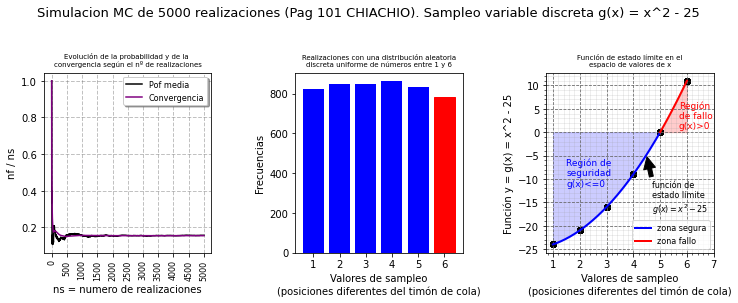

Tiempo de ejecución : 1.52359 segundos.
Memoria utilizada   : 13.23828 Mb.


In [4]:
def main():                    # Flujo de programa principal

    memo_ini = memory_usage()
    #t_ini = default_timer()
    tiempo_ini = perf_counter()
   
    ns = 5000    # Numero de sampleos (realizaciones)
    imax = 6     # Numero de posiciones diferentes del timón de cola
    
    # Llamada a función de cálculos
    PoF, Fiabilidad, valores_frecuencias, pof_med, converg, sampleo, vector_gx = calculos(ns, imax)    
    # print(calculos.__doc__) 
   
    # Llamada a funcion que representa las gráficas
    muestra_graficas(ns, imax, valores_frecuencias, pof_med, converg, sampleo, vector_gx)
    #print(muestra_graficas.__doc__)
    
    #t_fin = default_timer()
    tiempo_fin = perf_counter()
    memo_fin = memory_usage()

    print(f"Tiempo de ejecución : {tiempo_fin - tiempo_ini :.5f} segundos.")
    print(f"Memoria utilizada   : {memo_fin[0] - memo_ini[0] :.5f} Mb.")

    
if __name__ == "__main__":
    main()                     # Llamada al programa principal